# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [ ]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [3]:
# Define the col names for the iris dataset
col_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

# Dataset url
iris_url = "~/escuela/semana_tec_analitica/TC1002S/NotebooksStudents/A01642759/iris/iris.data"

# Load the dataset from HHDD
iris_df = pd.read_csv(iris_url,names=col_names)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
iris_df.shape

(150, 5)

2. Drop rows with any missing values


In [5]:
iris_df.isna().sum()
# There are no missing values

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

3. Encoding the class label categorical column: from string to num


In [6]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
iris_df = iris_df.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

#Visualize the dataset
iris_df.head()

/tmp/ipykernel_19942/107475468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_df = iris_df.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

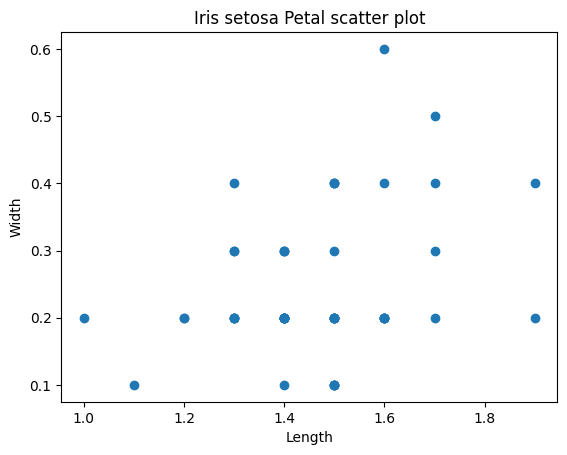

In [16]:
#Iris setosa
plt.scatter(iris_df[iris_df["class"]==0]["petal length"], iris_df[iris_df["class"]==0]["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris setosa Petal scatter plot')

# Show plot
plt.show()

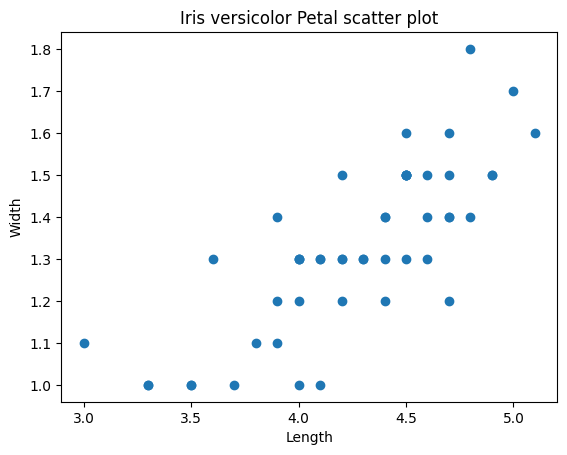

In [17]:
#Iris versicolor
plt.scatter(iris_df[iris_df["class"]==1]["petal length"], iris_df[iris_df["class"]==1]["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris versicolor Petal scatter plot')

# Show plot
plt.show()

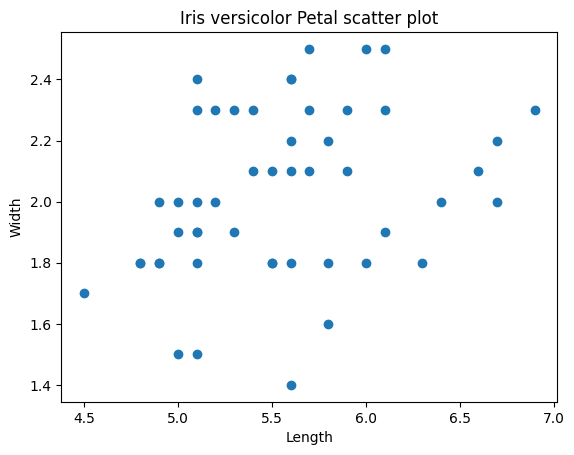

In [18]:
#Iris verginica
plt.scatter(iris_df[iris_df["class"]==2]["petal length"], iris_df[iris_df["class"]==2]["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris versicolor Petal scatter plot')

# Show plot
plt.show()

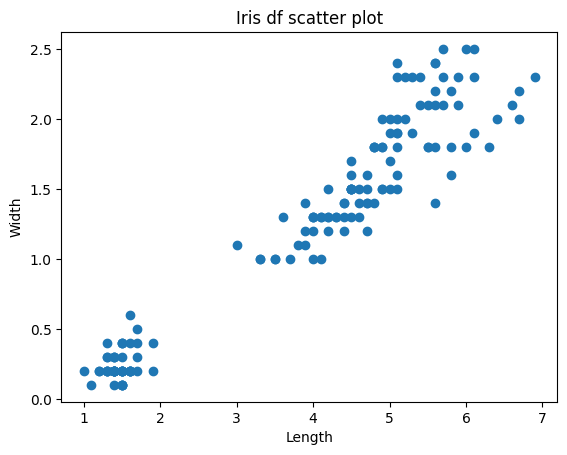

In [20]:
#Iris df 
plt.scatter(iris_df["petal length"], iris_df["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris df scatter plot')

# Show plot
plt.show()

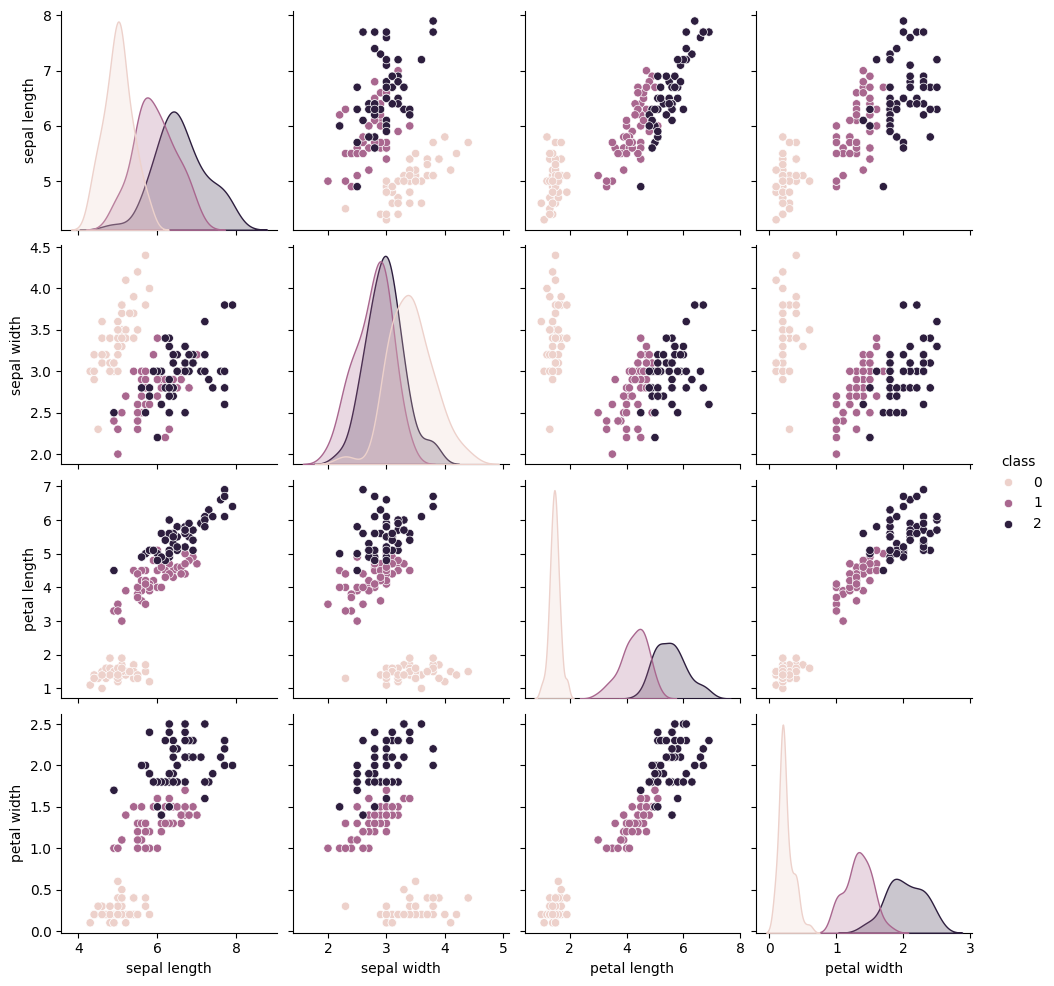

In [30]:
# Pairplot: Scatterplot of all variables
sns.pairplot(iris_df,hue="class")

# Show the plot
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

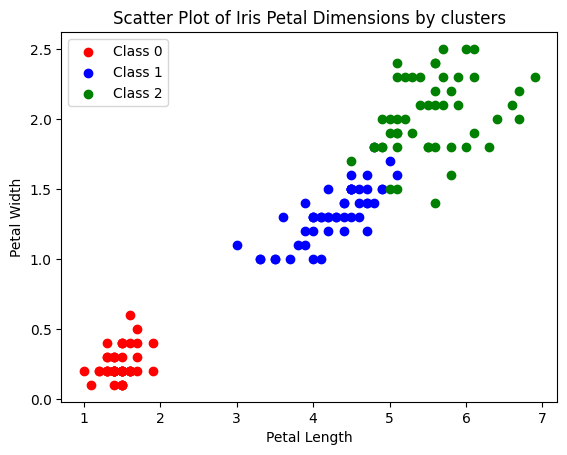

In [31]:
# Get dataframes for each real cluster
c0 = iris_df[iris_df["class"] == 0]
c1 = iris_df[iris_df["class"] == 1]
c2 = iris_df[iris_df["class"] == 2]
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create scatter plot for each cluster
plt.scatter(c0["petal length"], c0["petal width"], color='red', label='Class 0')
plt.scatter(c1["petal length"], c1["petal width"], color='blue', label='Class 1')
plt.scatter(c2["petal length"], c2["petal width"], color='green', label='Class 2')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.title('Scatter Plot of Iris Petal Dimensions by clusters')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [35]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
n_clusters = 3
# Print estimated cluster of each point in the dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(iris_df)
labels = kmeans.predict(iris_df)


In [39]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [ ]:
# Manual pairing the labels of the real and estimated clusters


In [ ]:
# Add a new column to the dataset with the cluster information


In [ ]:
# Label of the estimated clusters


In [ ]:
# Cluster centroides



In [ ]:
# Sum of squared error (sse) of the final model


In [ ]:
# The number of iterations required to converge


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

## Plot both real and estimated clusters to check for errors

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
# Intialize a list to hold sum of squared error (sse)

# Define values of k


# For each k



In [ ]:
# Plot sse versus k


Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k